In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

sns.set()

In [260]:
def woe_ordered_continuous(df,var,target):
    df1 = pd.concat([df[var],target],axis=1)
    df2 = df1.groupby(var).agg({'good_bad':'mean'}).reset_index()
    df3 = pd.concat([df2,df1[var].value_counts().sort_index().reset_index().iloc[:,1]],axis=1)
    df3.columns = ['grade','good_prop','cnt']
    # Good / bad
    df3['good'] = df3['good_prop'] * df3.cnt
    df3['bad'] = (1-df3['good_prop']) * df3.cnt
    # As %
    df3['good_pct'] = df3.good / df3.good.sum()
    df3['bad_pct'] = df3.bad / df3.bad.sum()
    # Woe
    df3['woe'] = np.log(df3.good_pct / df3.bad_pct)
    # df3.sort_values('woe',inplace=True)
    # df3.reset_index(drop=True,inplace=True)
    # Differences
    df3['diff_good_prop'] = df3.good_prop.diff().abs()
    df3['diff_woe'] = df3.woe.diff().abs()
    # IV
    df3['iv'] = (df3.woe * (df3.good_pct - df3.bad_pct)).sum()
    return df3

In [261]:
def plot_by_woe(df,rotation=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df.loc[:,'woe']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.title('Weight of evidence by '+df.columns.values[0])
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WoE')
    plt.xticks(rotation=rotation)

### Data

In [262]:
df = pd.read_csv('../processed/x_train_03_output.csv')
target = pd.read_csv('../processed/y_train.csv')

In [263]:
df_temp = woe_ordered_continuous(df,'term_int',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,36,0.915135,270419,247470.0,22949.0,0.733501,0.643803,0.130436,NaN,NaN,0.037722
1,60,0.876258,102609,89912.0,12697.0,0.266499,0.356197,-0.290113,0.038877,0.420549,0.037722


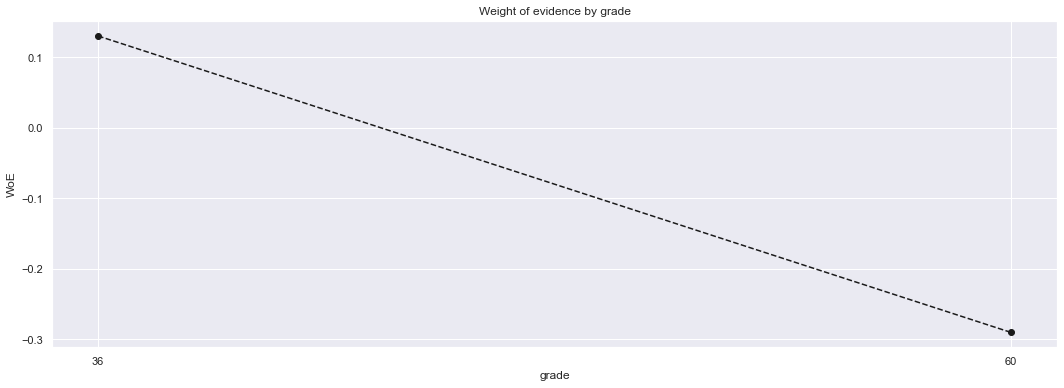

In [264]:
plot_by_woe(df_temp)

In [265]:
df['term_int_36'] = np.where(df.term_int == 36,1,0)
df['term_int_60'] = np.where(df.term_int == 60,1,0)

In [266]:
df_temp = woe_ordered_continuous(df,'emp_length_int',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0,0.892060,45720,40785.0,4935.0,0.120887,0.138445,-0.135617,NaN,NaN,0.006894
1,1,0.901835,23654,21332.0,2322.0,0.063228,0.065141,-0.029799,0.009774,0.105818,0.006894
2,2,0.904740,33078,29927.0,3151.0,0.088704,0.088397,0.003462,0.002906,0.033262,0.006894
3,3,0.904708,29205,26422.0,2783.0,0.078315,0.078073,0.003089,0.000032,0.000374,0.006894
4,4,0.902617,22468,20280.0,2188.0,0.060110,0.061381,-0.020932,0.002091,0.024020,0.006894
5,5,0.897041,24602,22069.0,2533.0,0.065412,0.071060,-0.082809,0.005576,0.061878,0.006894
6,6,0.898406,20887,18765.0,2122.0,0.055619,0.059530,-0.067944,0.001365,0.014865,0.006894
7,7,0.900803,21049,18961.0,2088.0,0.056200,0.058576,-0.041401,0.002397,0.026543,0.006894
8,8,0.904778,17853,16153.0,1700.0,0.047877,0.047691,0.003899,0.003975,0.045300,0.006894
9,9,0.901731,14267,12865.0,1402.0,0.038132,0.039331,-0.030968,0.003047,0.034867,0.006894


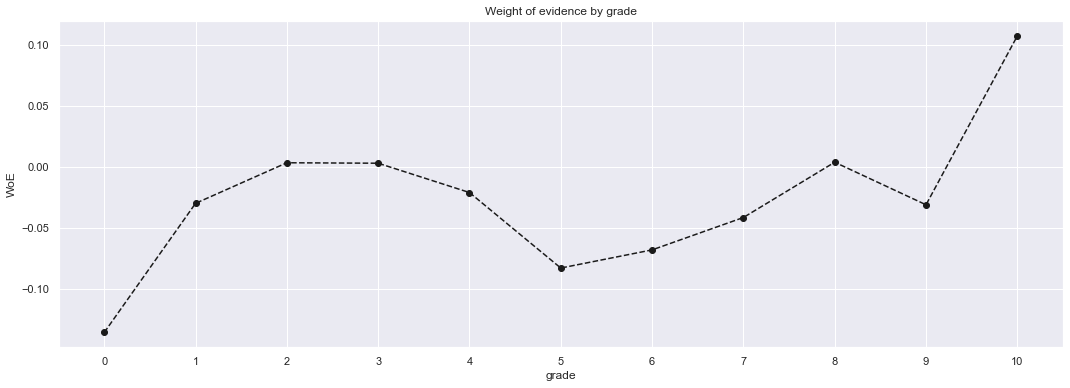

In [267]:
plot_by_woe(df_temp)

In [268]:
df['emp_length_int_0'] = np.where(df.emp_length_int == 0,1,0)
df['emp_length_int_1'] = np.where(df.emp_length_int == 1,1,0)
df['emp_length_int_2_4'] = np.where(np.isin(df.emp_length_int,[2,3,4]),1,0)
df['emp_length_int_5_6'] = np.where(np.isin(df.emp_length_int,[5,6]),1,0)
df['emp_length_int_7_9'] = np.where(np.isin(df.emp_length_int,[7,8,9]),1,0)
df['emp_length_int_10'] = np.where(df.emp_length_int == 10,1,0)

In [269]:
df.mths_since_issue_d.unique()

array([ 34,  53,  43,  33,  90,  26,  80,  42,  31,  46,  47,  32,  29,
        40,  48, 102,  39,  51,  38,  36,  37,  30,  27,  55,  58,  76,
        35,  65,  52,  28,  50,  78,  54,  45,  68,  57,  41,  49,  62,
        63,  59,  77,  70,  71,  44,  92,  72,  61,  74,  25,  60,  81,
        66,  56,  73,  75,  79, 105,  82,  84,  67,  64,  69,  85,  83,
        87,  93, 114,  94, 107,  99, 108, 103,  86,  91,  95,  89, 111,
       110,  97, 106, 109, 113,  88, 104, 101,  98, 112,  96, 115, 100])

In [270]:
df['mths_since_issue_d_factor'] = pd.cut(df.mths_since_issue_d,50)

In [271]:
df_temp = woe_ordered_continuous(df,'mths_since_issue_d_factor',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(24.91, 26.8]",0.961839,28170,27095.0,1075.0,0.080310,0.030158,0.979450,NaN,NaN,inf
1,"(26.8, 28.6]",0.946690,39636,37523.0,2113.0,0.111218,0.059277,0.629266,0.015149,0.350183,inf
2,"(28.6, 30.4]",0.934350,38614,36079.0,2535.0,0.106938,0.071116,0.407938,0.012340,0.221328,inf
3,"(30.4, 32.2]",0.924409,29038,26843.0,2195.0,0.079563,0.061578,0.256244,0.009941,0.151694,inf
4,"(32.2, 34.0]",0.918285,28367,26049.0,2318.0,0.077209,0.065028,0.171696,0.006124,0.084548,inf
5,"(34.0, 35.8]",0.911961,12165,11094.0,1071.0,0.032883,0.030045,0.090233,0.006325,0.081463,inf
6,"(35.8, 37.6]",0.912887,24451,22321.0,2130.0,0.066159,0.059754,0.101827,0.000926,0.011594,inf
7,"(37.6, 39.4]",0.900953,22969,20694.0,2275.0,0.061337,0.063822,-0.039715,0.011934,0.141542,inf
8,"(39.4, 41.2]",0.890165,20640,18373.0,2267.0,0.054458,0.063598,-0.155154,0.010789,0.115439,inf
9,"(41.2, 43.0]",0.877730,18312,16073.0,2239.0,0.047640,0.062812,-0.276467,0.012434,0.121313,inf


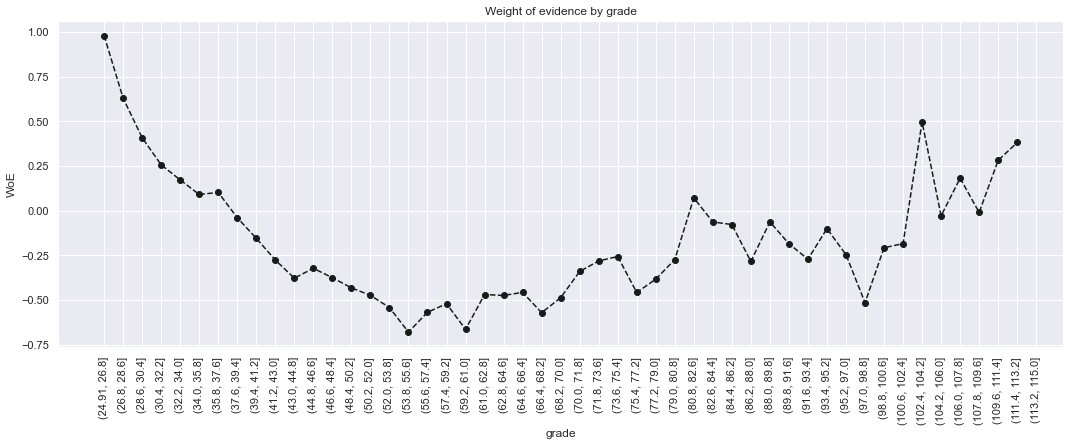

In [272]:
plot_by_woe(df_temp, rotation = 90)

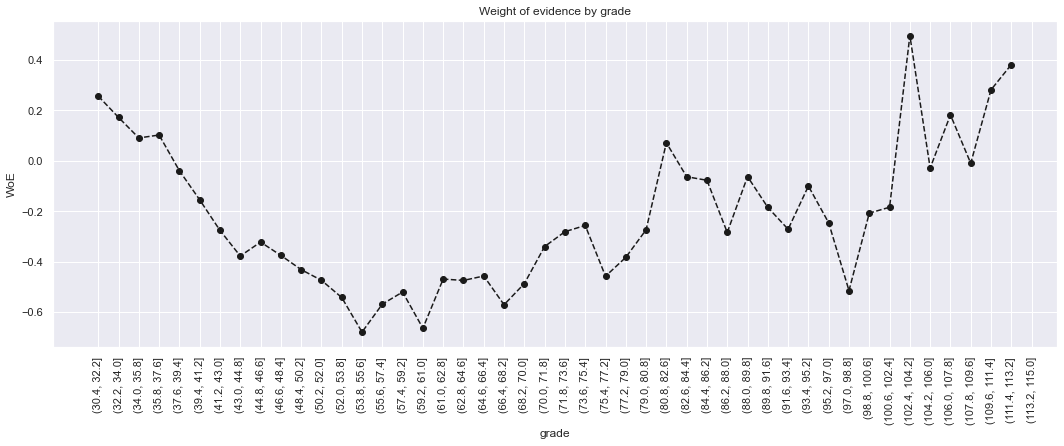

In [273]:
plot_by_woe(df_temp.iloc[3:],rotation=90)

In [274]:
df['mths_since_issue_d_27'] = np.where(df.mths_since_issue_d<=27,1,0)
df['mths_since_issue_d_27_29'] = np.where((df.mths_since_issue_d>27)&(df.mths_since_issue_d<=29),1,0)
df['mths_since_issue_d_29_30'] = np.where((df.mths_since_issue_d>29)&(df.mths_since_issue_d<=30),1,0)
df['mths_since_issue_d_30_39'] = np.where((df.mths_since_issue_d>30)&(df.mths_since_issue_d<=39),1,0)
df['mths_since_issue_d_39_45'] = np.where((df.mths_since_issue_d>39)&(df.mths_since_issue_d<=45),1,0)
df['mths_since_issue_d_45_56'] = np.where((df.mths_since_issue_d>45)&(df.mths_since_issue_d<=56),1,0)
df['mths_since_issue_d_56_84'] = np.where((df.mths_since_issue_d>56)&(df.mths_since_issue_d<=84),1,0)
df['mths_since_issue_d_84'] = np.where(df.mths_since_issue_d>84,1,0)


In [275]:
df['int_rate_factor'] = pd.cut(df.int_rate,50)

In [276]:
df_temp = woe_ordered_continuous(df,'int_rate_factor',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(5.399, 5.833]",0.961783,785,755.0,30.0,0.002238,0.000842,0.977941,NaN,NaN,0.347968
1,"(5.833, 6.246]",0.982149,8459,8308.0,151.0,0.024625,0.004236,1.760115,0.020366,0.782174,0.347968
2,"(6.246, 6.658]",0.974572,7826,7627.0,199.0,0.022606,0.005583,1.398566,0.007577,0.361549,0.347968
3,"(6.658, 7.071]",0.974119,1816,1769.0,47.0,0.005243,0.001319,1.380443,0.000453,0.018123,0.347968
4,"(7.071, 7.484]",0.980592,3143,3082.0,61.0,0.009135,0.001711,1.674881,0.006473,0.294438,0.347968
5,"(7.484, 7.897]",0.966378,12581,12158.0,423.0,0.036036,0.011867,1.110792,0.014214,0.564090,0.347968
6,"(7.897, 8.31]",0.954062,9687,9242.0,445.0,0.027393,0.012484,0.785860,0.012316,0.324931,0.347968
7,"(8.31, 8.722]",0.974067,6594,6423.0,171.0,0.019038,0.004797,1.378398,0.020005,0.592538,0.347968
8,"(8.722, 9.135]",0.941294,9539,8979.0,560.0,0.026614,0.015710,0.527128,0.032774,0.851270,0.347968
9,"(9.135, 9.548]",0.972759,6681,6499.0,182.0,0.019263,0.005106,1.327818,0.031465,0.800690,0.347968


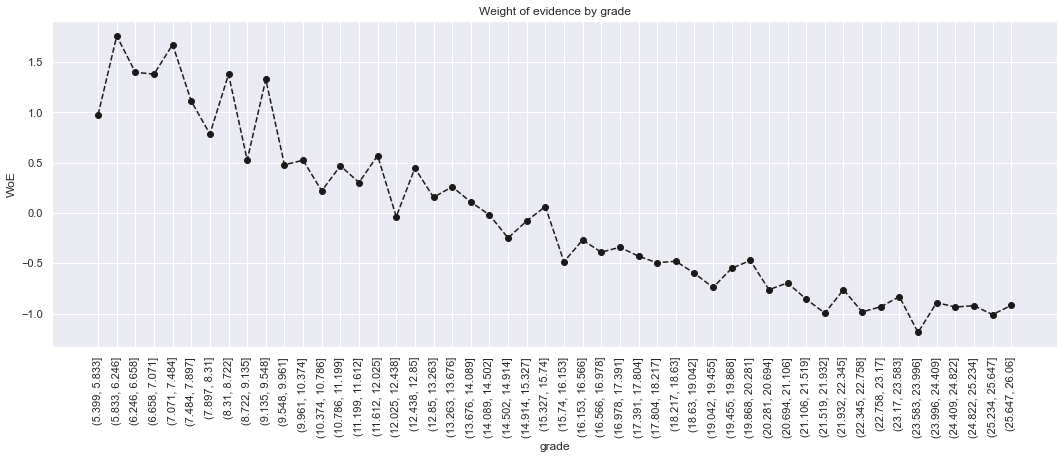

In [277]:
plot_by_woe(df_temp,rotation=90)

In [278]:
df['int_rate_9.548'] = np.where((df['int_rate'] <= 9.548), 1, 0)
df['int_rate_9.548-12.025'] = np.where((df['int_rate'] > 9.548) & (df['int_rate'] <= 12.025), 1, 0)
df['int_rate_12.025-15.74'] = np.where((df['int_rate'] > 12.025) & (df['int_rate'] <= 15.74), 1, 0)
df['int_rate_15.74-20.281'] = np.where((df['int_rate'] > 15.74) & (df['int_rate'] <= 20.281), 1, 0)
df['int_rate_>20.281'] = np.where((df['int_rate'] > 20.281), 1, 0)

In [279]:
df['funded_amnt_factor'] = pd.cut(df['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df, 'funded_amnt_factor', target)
# We calculate weight of evidence.
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(465.5, 1190.0]",0.923203,1224,1130.0,94.0,0.003349,0.002637,0.239099,NaN,NaN,0.015737
1,"(1190.0, 1880.0]",0.915125,3028,2771.0,257.0,0.008213,0.007210,0.130309,0.008077,0.108791,0.015737
2,"(1880.0, 2570.0]",0.905949,6018,5452.0,566.0,0.016160,0.015878,0.017565,0.009177,0.112744,0.015737
3,"(2570.0, 3260.0]",0.899834,7248,6522.0,726.0,0.019331,0.020367,-0.052193,0.006114,0.069757,0.015737
4,"(3260.0, 3950.0]",0.900232,4751,4277.0,474.0,0.012677,0.013297,-0.047779,0.000397,0.004413,0.015737
5,"(3950.0, 4640.0]",0.901806,9023,8137.0,886.0,0.024118,0.024856,-0.030119,0.001575,0.017660,0.015737
6,"(4640.0, 5330.0]",0.906559,15903,14417.0,1486.0,0.042732,0.041688,0.024741,0.004752,0.054860,0.015737
7,"(5330.0, 6020.0]",0.916686,17236,15800.0,1436.0,0.046831,0.040285,0.150570,0.010127,0.125828,0.015737
8,"(6020.0, 6710.0]",0.898901,6914,6215.0,699.0,0.018421,0.019609,-0.062509,0.017785,0.213078,0.015737
9,"(6710.0, 7400.0]",0.912502,11806,10773.0,1033.0,0.031931,0.028979,0.096997,0.013601,0.159506,0.015737


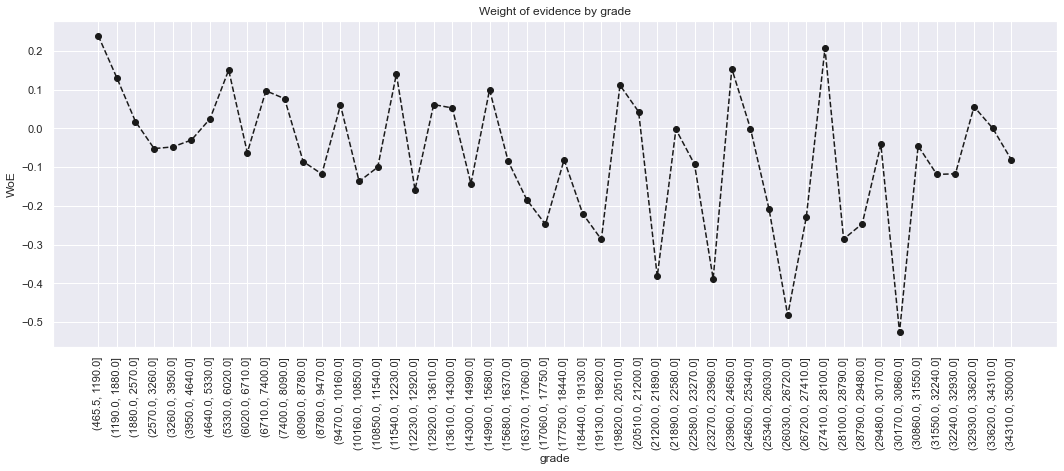

In [280]:
plot_by_woe(df_temp,90)

In [281]:
df['mths_since_earliest_cr_line_factor'] = pd.cut(df['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df, 'mths_since_earliest_cr_line_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.188, 3.76]",0.906955,5277,4786.0,491.0,0.030490,0.030927,-0.014221,NaN,NaN,inf
1,"(3.76, 7.52]",0.903734,11167,10092.0,1075.0,0.064294,0.067712,-0.051805,0.003220,0.037584,inf
2,"(7.52, 11.28]",0.909815,13306,12106.0,1200.0,0.077124,0.075586,0.020153,0.006081,0.071957,inf
3,"(11.28, 15.04]",0.904585,13216,11955.0,1261.0,0.076163,0.079428,-0.041983,0.005230,0.062135,inf
4,"(15.04, 18.8]",0.909286,9337,8490.0,847.0,0.054088,0.053351,0.013717,0.004700,0.055699,inf
5,"(18.8, 22.56]",0.908341,11641,10574.0,1067.0,0.067364,0.067208,0.002320,0.000944,0.011396,inf
6,"(22.56, 26.32]",0.909984,10887,9907.0,980.0,0.063115,0.061728,0.022217,0.001643,0.019897,inf
7,"(26.32, 30.08]",0.908807,10560,9597.0,963.0,0.061140,0.060658,0.007925,0.001178,0.014292,inf
8,"(30.08, 33.84]",0.916183,7576,6941.0,635.0,0.044219,0.039997,0.100349,0.007376,0.092424,inf
9,"(33.84, 37.6]",0.913017,9795,8943.0,852.0,0.056974,0.053666,0.059813,0.003166,0.040536,inf


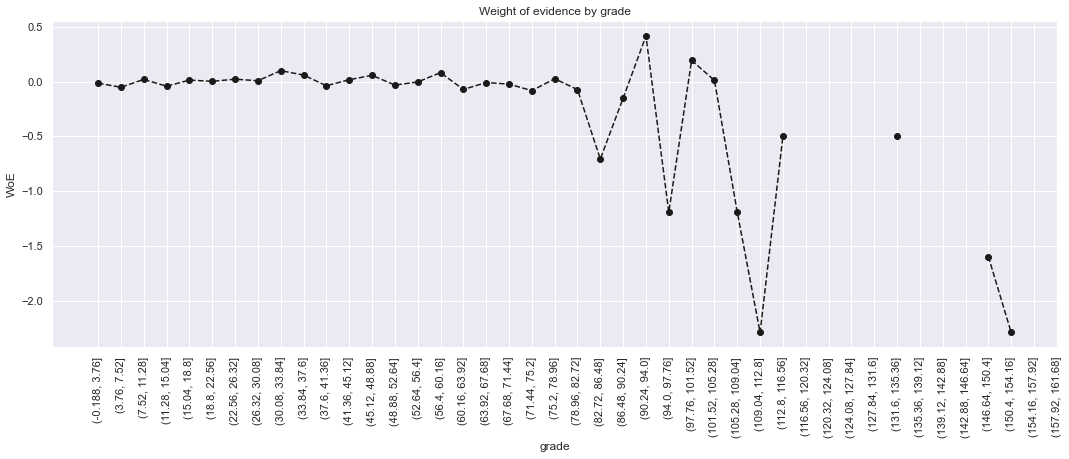

In [282]:
plot_by_woe(df_temp, 90)

In [283]:
df['mths_since_earliest_cr_line:<140'] = np.where(df['mths_since_last_delinq'].isin(range(140)), 1, 0)
df['mths_since_earliest_cr_line:141-164'] = np.where(df['mths_since_last_delinq'].isin(range(140, 165)), 1, 0)
df['mths_since_earliest_cr_line:165-247'] = np.where(df['mths_since_last_delinq'].isin(range(165, 248)), 1, 0)
df['mths_since_earliest_cr_line:248-270'] = np.where(df['mths_since_last_delinq'].isin(range(248, 271)), 1, 0)
df['mths_since_earliest_cr_line:271-352'] = np.where(df['mths_since_last_delinq'].isin(range(271, 353)), 1, 0)
df['mths_since_earliest_cr_line:>352'] = np.where(df['mths_since_last_delinq'].isin(range(353, int(df['mths_since_last_delinq'].max()))), 1, 0)

In [284]:
df_temp = woe_ordered_continuous(df, 'delinq_2yrs', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.903801,306417,276940.0,29477.0,0.820850,0.826937,-0.007388,NaN,NaN,inf
1,1.0,0.908340,44927,40809.0,4118.0,0.120958,0.115525,0.045956,0.004539,0.053344,inf
2,2.0,0.906007,13118,11885.0,1233.0,0.035227,0.034590,0.018248,0.002333,0.027708,inf
3,3.0,0.902857,4550,4108.0,442.0,0.012176,0.012400,-0.018197,0.003150,0.036445,inf
4,4.0,0.911670,1868,1703.0,165.0,0.005048,0.004629,0.086622,0.008813,0.104820,inf
5,5.0,0.894410,966,864.0,102.0,0.002561,0.002861,-0.110979,0.017260,0.197601,inf
6,6.0,0.924152,501,463.0,38.0,0.001372,0.001066,0.252562,0.029742,0.363541,inf
7,7.0,0.885305,279,247.0,32.0,0.000732,0.000898,-0.203926,0.038847,0.456488,inf
8,8.0,0.932432,148,138.0,10.0,0.000409,0.000281,0.377090,0.047128,0.581016,inf
9,9.0,0.898876,89,80.0,9.0,0.000237,0.000252,-0.062777,0.033556,0.439867,inf


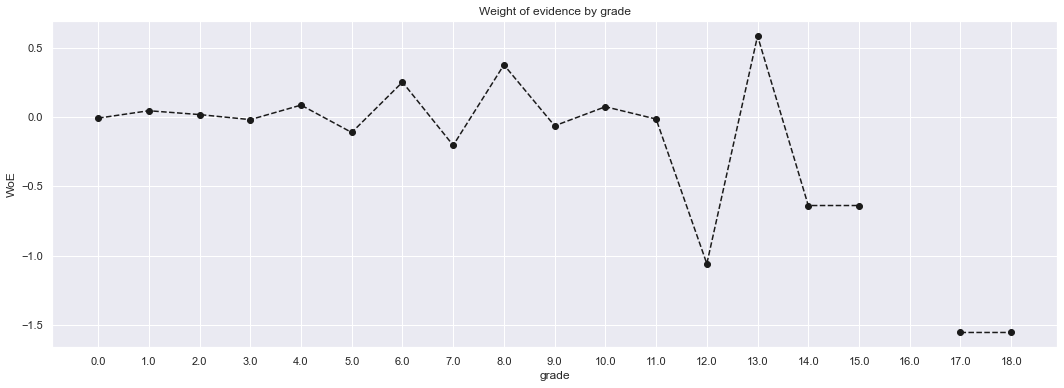

In [285]:
plot_by_woe(df_temp)

In [286]:
df['delinq_2yrs:0'] = np.where((df['delinq_2yrs'] == 0), 1, 0)
df['delinq_2yrs:1-3'] = np.where((df['delinq_2yrs'] >= 1) & (df['delinq_2yrs'] <= 3), 1, 0)
df['delinq_2yrs:>=4'] = np.where((df['delinq_2yrs'] >= 9), 1, 0)

In [287]:
df_temp = woe_ordered_continuous(df, 'inq_last_6mths', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.919806,193232,177736.0,15496.0,0.526809,0.434719,0.192138,NaN,NaN,inf
1,1.0,0.898332,104163,93573.0,10590.0,0.277350,0.297088,-0.068747,0.021474,0.260886,inf
2,2.0,0.878435,46214,40596.0,5618.0,0.120327,0.157605,-0.269885,0.019897,0.201138,inf
3,3.0,0.855090,20040,17136.0,2904.0,0.050791,0.081468,-0.472486,0.023345,0.202601,inf
4,4.0,0.885542,5810,5145.0,665.0,0.015250,0.018656,-0.201585,0.030452,0.270901,inf
5,5.0,0.888588,2217,1970.0,247.0,0.005839,0.006929,-0.171178,0.003046,0.030407,inf
6,6.0,0.882293,977,862.0,115.0,0.002555,0.003226,-0.233256,0.006295,0.062077,inf
7,7.0,0.949686,159,151.0,8.0,0.000448,0.000224,0.690259,0.067393,0.923515,inf
8,8.0,0.970297,101,98.0,3.0,0.000290,0.000084,1.238776,0.020611,0.548517,inf
9,9.0,1.000000,43,43.0,0.0,0.000127,0.000000,inf,0.029703,inf,inf


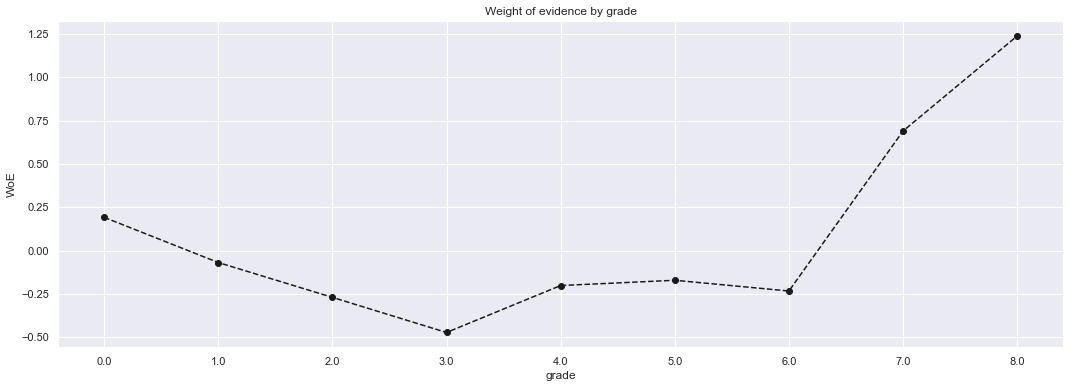

In [288]:
plot_by_woe(df_temp)

In [289]:
df['inq_last_6mths:0'] = np.where((df['inq_last_6mths'] == 0), 1, 0)
df['inq_last_6mths:1-2'] = np.where((df['inq_last_6mths'] >= 1) & (df['inq_last_6mths'] <= 2), 1, 0)
df['inq_last_6mths:3-6'] = np.where((df['inq_last_6mths'] >= 3) & (df['inq_last_6mths'] <= 6), 1, 0)
df['inq_last_6mths:>6'] = np.where((df['inq_last_6mths'] > 6), 1, 0)

In [290]:
df_temp = woe_ordered_continuous(df, 'open_acc', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.896552,29,26.0,3.0,0.000077,0.000084,-0.088095,NaN,NaN,inf
1,1.0,0.936364,110,103.0,7.0,0.000305,0.000196,0.441240,0.039812,0.529335,inf
2,2.0,0.866758,1456,1262.0,194.0,0.003741,0.005442,-0.374984,0.069605,0.816224,inf
3,3.0,0.888305,4378,3889.0,489.0,0.011527,0.013718,-0.174034,0.021547,0.200950,inf
4,4.0,0.901775,10028,9043.0,985.0,0.026803,0.027633,-0.030474,0.013470,0.143560,inf
...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,1.000000,1,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
57,62.0,1.000000,1,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,75.0,1.000000,1,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,76.0,0.500000,2,1.0,1.0,0.000003,0.000028,-2.247579,0.500000,inf,inf


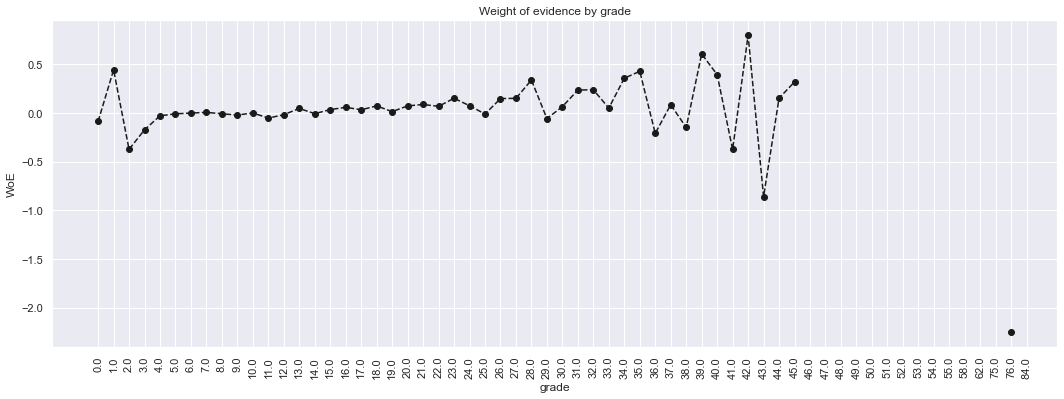

In [291]:
plot_by_woe(df_temp, 90)

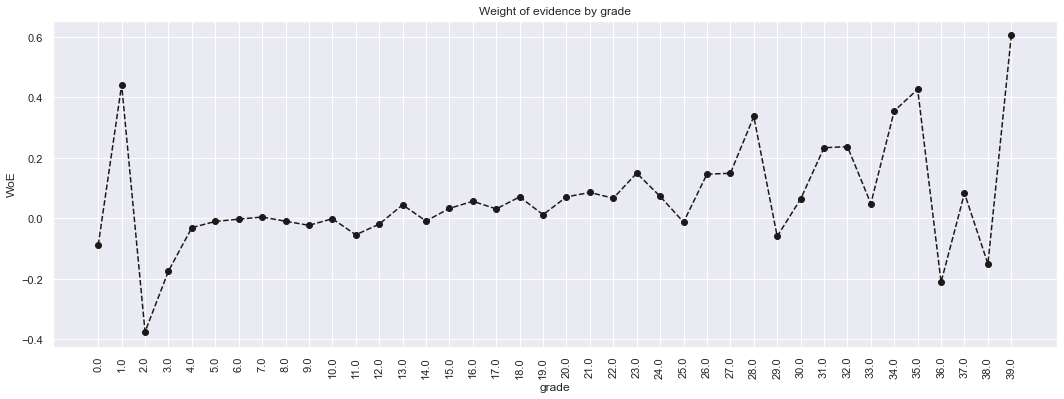

In [292]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [293]:
df['open_acc:0'] = np.where((df['open_acc'] == 0), 1, 0)
df['open_acc:1-3'] = np.where((df['open_acc'] >= 1) & (df['open_acc'] <= 3), 1, 0)
df['open_acc:4-12'] = np.where((df['open_acc'] >= 4) & (df['open_acc'] <= 12), 1, 0)
df['open_acc:13-17'] = np.where((df['open_acc'] >= 13) & (df['open_acc'] <= 17), 1, 0)
df['open_acc:18-22'] = np.where((df['open_acc'] >= 18) & (df['open_acc'] <= 22), 1, 0)
df['open_acc:23-25'] = np.where((df['open_acc'] >= 23) & (df['open_acc'] <= 25), 1, 0)
df['open_acc:26-30'] = np.where((df['open_acc'] >= 26) & (df['open_acc'] <= 30), 1, 0)
df['open_acc:>=31'] = np.where((df['open_acc'] >= 31), 1, 0)

In [294]:
df_temp = woe_ordered_continuous(df, 'pub_rec', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.903324,323999,292676.0,31323.0,0.867491,0.878724,-0.012865,NaN,NaN,inf
1,1.0,0.910078,42381,38570.0,3811.0,0.114321,0.106912,0.067004,0.006754,0.079870,inf
2,2.0,0.916059,4527,4147.0,380.0,0.012292,0.010660,0.142390,0.005982,0.075386,inf
3,3.0,0.938281,1280,1201.0,79.0,0.003560,0.002216,0.473883,0.022222,0.331493,inf
4,4.0,0.936275,408,382.0,26.0,0.001132,0.000729,0.439745,0.002007,0.034138,inf
5,5.0,0.926108,203,188.0,15.0,0.000557,0.000421,0.280813,0.010166,0.158932,inf
6,6.0,0.931624,117,109.0,8.0,0.000323,0.000224,0.364327,0.005516,0.083515,inf
7,7.0,0.958333,48,46.0,2.0,0.000136,0.000056,0.887915,0.026709,0.523588,inf
8,8.0,1.000000,24,24.0,0.0,0.000071,0.000000,inf,0.041667,inf,inf
9,9.0,0.857143,14,12.0,2.0,0.000036,0.000056,-0.455819,0.142857,inf,inf


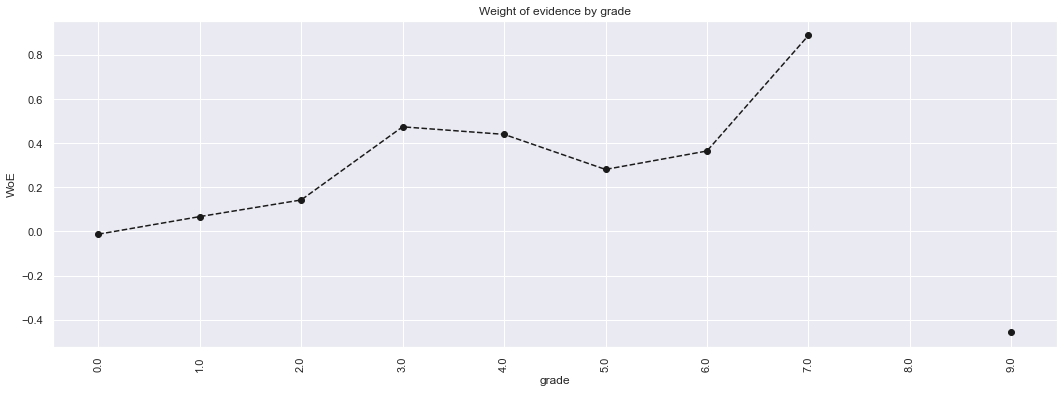

In [295]:
plot_by_woe(df_temp, 90)

In [296]:
df['pub_rec:0-2'] = np.where((df['pub_rec'] >= 0) & (df['pub_rec'] <= 2), 1, 0)
df['pub_rec:3-4'] = np.where((df['pub_rec'] >= 3) & (df['pub_rec'] <= 4), 1, 0)
df['pub_rec:>=5'] = np.where((df['pub_rec'] >= 5), 1, 0)

In [297]:
df['total_acc_factor'] = pd.cut(df['total_acc'], 50)
df_temp = woe_ordered_continuous(df, 'total_acc_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.15, 3.0]",0.880174,459,404.0,55.0,0.001197,0.001543,-0.253497,NaN,NaN,inf
1,"(3.0, 6.0]",0.878914,6004,5277.0,727.0,0.015641,0.020395,-0.265392,0.001260,0.011895,inf
2,"(6.0, 9.0]",0.888084,15047,13363.0,1684.0,0.039608,0.047242,-0.176261,0.009170,0.089131,inf
3,"(9.0, 12.0]",0.894831,25169,22522.0,2647.0,0.066755,0.074258,-0.106513,0.006747,0.069748,inf
4,"(12.0, 15.0]",0.896437,33651,30166.0,3485.0,0.089412,0.097767,-0.089331,0.001606,0.017182,inf
5,"(15.0, 18.0]",0.901243,38711,34888.0,3823.0,0.103408,0.107249,-0.036471,0.004806,0.052860,inf
6,"(18.0, 21.0]",0.899603,40599,36523.0,4076.0,0.108254,0.114347,-0.054753,0.001639,0.018281,inf
7,"(21.0, 24.0]",0.904788,40163,36339.0,3824.0,0.107709,0.107277,0.004016,0.005185,0.058768,inf
8,"(24.0, 27.0]",0.908890,36286,32980.0,3306.0,0.097753,0.092745,0.052583,0.004102,0.048568,inf
9,"(27.0, 30.0]",0.910936,31775,28945.0,2830.0,0.085793,0.079392,0.077542,0.002046,0.024958,inf


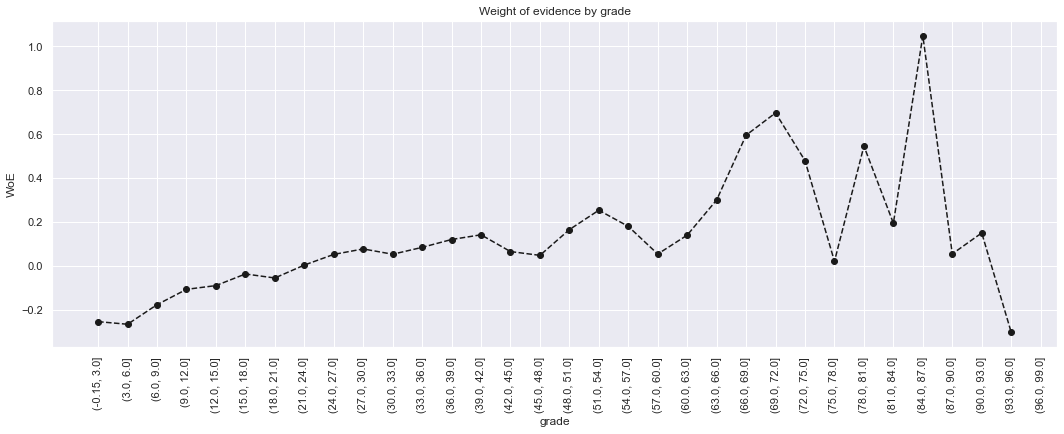

In [298]:
plot_by_woe(df_temp, 90)

In [299]:
df['total_acc:<=27'] = np.where((df['total_acc'] <= 27), 1, 0)
df['total_acc:28-51'] = np.where((df['total_acc'] >= 28) & (df['total_acc'] <= 51), 1, 0)
df['total_acc:>=52'] = np.where((df['total_acc'] >= 52), 1, 0)

In [300]:
df_temp = woe_ordered_continuous(df, 'acc_now_delinq', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.904410,371682,336153.0,35529.0,0.996357,0.996718,-0.000362,NaN,NaN,inf
1,1.0,0.912114,1263,1152.0,111.0,0.003415,0.003114,0.092146,0.007704,0.092507,inf
2,2.0,0.942857,70,66.0,4.0,0.000196,0.000112,0.555781,0.030743,0.463636,inf
3,3.0,0.857143,7,6.0,1.0,0.000018,0.000028,-0.455819,0.085714,1.011601,inf
4,4.0,1.000000,4,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,0.500000,2,1.0,1.0,0.000003,0.000028,-2.247579,0.500000,inf,inf


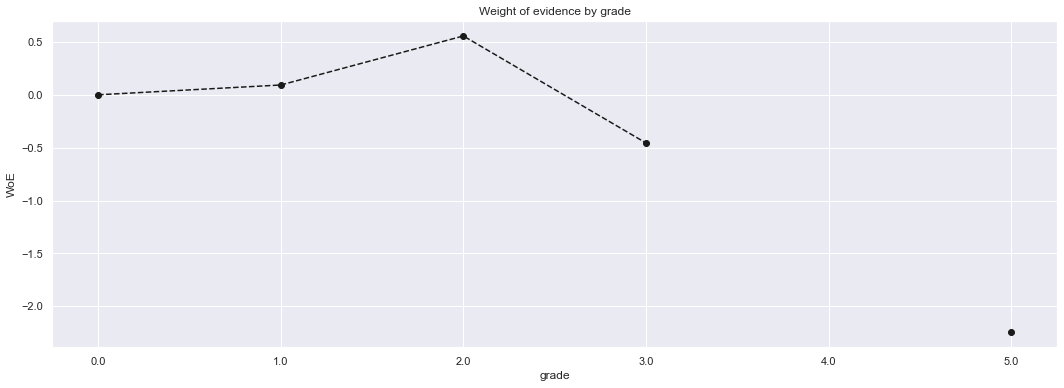

In [301]:
plot_by_woe(df_temp)

In [302]:
df['acc_now_delinq:0'] = np.where((df['acc_now_delinq'] == 0), 1, 0)
df['acc_now_delinq:>=1'] = np.where((df['acc_now_delinq'] >= 1), 1, 0)

In [303]:
df['total_rev_hi_lim_factor'] = pd.cut(df['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df, 'total_rev_hi_lim_factor', target)
df_temp

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-9999.999, 5000.0]",0.883041,19417,17146.0,2271.0,0.050821,0.063710,-0.226034,NaN,NaN,inf
1,"(5000.0, 9999.999]",0.892299,52655,46984.0,5671.0,0.139261,0.159092,-0.133137,0.009258,0.092897,inf
2,"(9999.999, 14999.998]",0.894208,59570,53268.0,6302.0,0.157886,0.176794,-0.113110,0.001910,0.020027,inf
3,"(14999.998, 19999.998]",0.892100,51455,45903.0,5552.0,0.136056,0.155754,-0.135207,0.002109,0.022096,inf
4,"(19999.998, 24999.997]",0.900029,41582,37425.0,4157.0,0.110928,0.116619,-0.050034,0.007929,0.085173,inf
...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


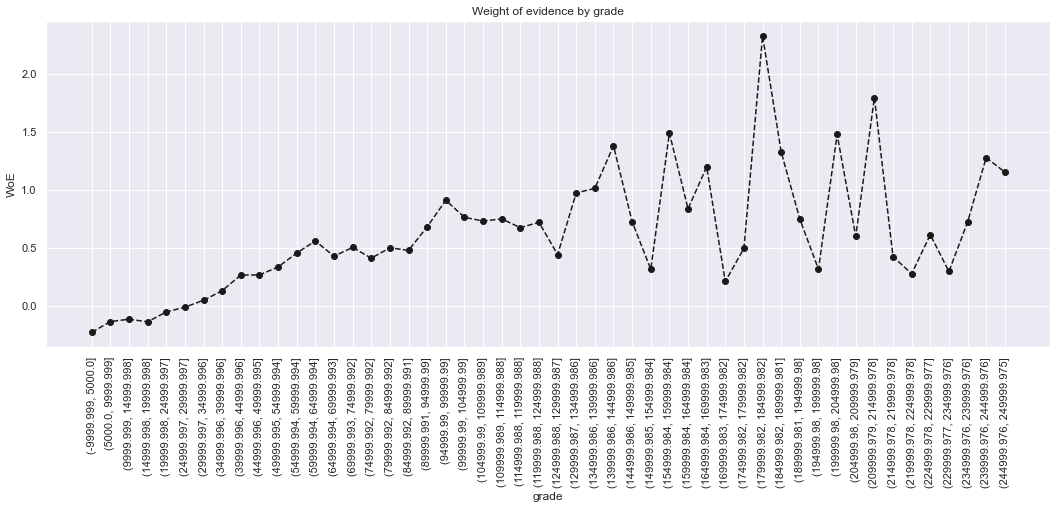

In [304]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [305]:
df['total_rev_hi_lim:<=5K'] = np.where((df['total_rev_hi_lim'] <= 5000), 1, 0)
df['total_rev_hi_lim:5K-10K'] = np.where((df['total_rev_hi_lim'] > 5000) & (df['total_rev_hi_lim'] <= 10000), 1, 0)
df['total_rev_hi_lim:10K-20K'] = np.where((df['total_rev_hi_lim'] > 10000) & (df['total_rev_hi_lim'] <= 20000), 1, 0)
df['total_rev_hi_lim:20K-30K'] = np.where((df['total_rev_hi_lim'] > 20000) & (df['total_rev_hi_lim'] <= 30000), 1, 0)
df['total_rev_hi_lim:30K-40K'] = np.where((df['total_rev_hi_lim'] > 30000) & (df['total_rev_hi_lim'] <= 40000), 1, 0)
df['total_rev_hi_lim:40K-55K'] = np.where((df['total_rev_hi_lim'] > 40000) & (df['total_rev_hi_lim'] <= 55000), 1, 0)
df['total_rev_hi_lim:55K-95K'] = np.where((df['total_rev_hi_lim'] > 55000) & (df['total_rev_hi_lim'] <= 95000), 1, 0)
df['total_rev_hi_lim:>95K'] = np.where((df['total_rev_hi_lim'] > 95000), 1, 0)

In [306]:
df['installment_factor'] = pd.cut(df['installment'], 50)
df_temp = woe_ordered_continuous(df, 'installment_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(14.276, 43.556]",0.920530,1812,1668.0,144.0,0.004944,0.004040,0.201988,NaN,NaN,0.013874
1,"(43.556, 71.443]",0.909316,4841,4402.0,439.0,0.013048,0.012316,0.057736,0.011214,0.144252,0.013874
2,"(71.443, 99.329]",0.903136,6824,6163.0,661.0,0.018267,0.018543,-0.015014,0.006180,0.072750,0.013874
3,"(99.329, 127.216]",0.901072,9138,8234.0,904.0,0.024406,0.025360,-0.038381,0.002064,0.023367,0.013874
4,"(127.216, 155.102]",0.905578,10040,9092.0,948.0,0.026949,0.026595,0.013217,0.004505,0.051598,0.013874
5,"(155.102, 182.988]",0.908658,16816,15280.0,1536.0,0.045290,0.043090,0.049784,0.003081,0.036567,0.013874
6,"(182.988, 210.875]",0.915428,17216,15760.0,1456.0,0.046713,0.040846,0.134203,0.006769,0.084419,0.013874
7,"(210.875, 238.761]",0.912260,15090,13766.0,1324.0,0.040802,0.037143,0.093965,0.003168,0.040238,0.013874
8,"(238.761, 266.648]",0.915773,18842,17255.0,1587.0,0.051144,0.044521,0.138678,0.003513,0.044712,0.013874
9,"(266.648, 294.534]",0.906517,20100,18221.0,1879.0,0.054007,0.052713,0.024256,0.009256,0.114421,0.013874


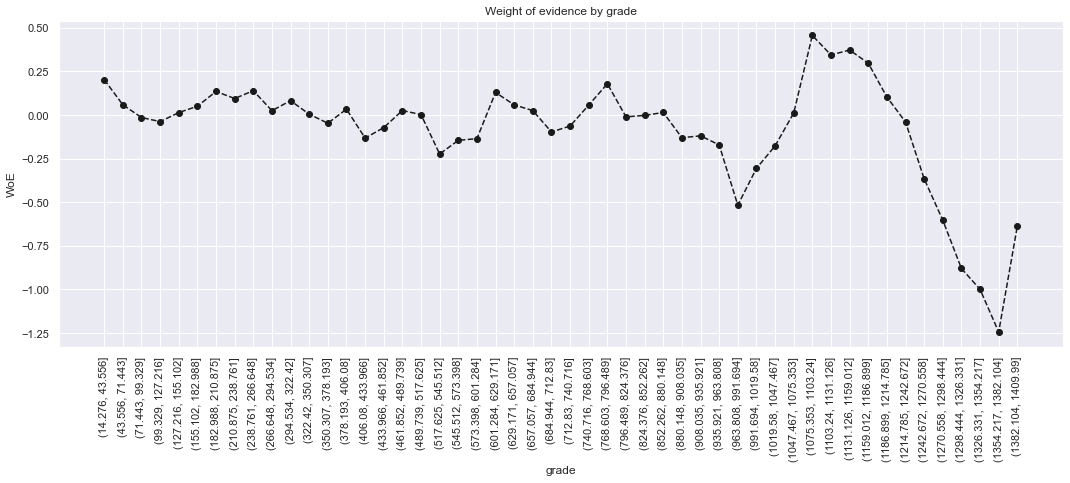

In [307]:
plot_by_woe(df_temp, 90)

In [308]:
df['annual_inc_factor'] = pd.cut(df['annual_inc'], 50)
df_temp = woe_ordered_continuous(df, 'annual_inc_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-5243.882, 144693.64]",0.902436,351904,317571.0,34333.0,0.941280,0.963166,-0.022984,NaN,NaN,inf
1,"(144693.64, 287491.28]",0.936855,19004,17804.0,1200.0,0.052771,0.033664,0.449523,0.034419,0.472507,inf
2,"(287491.28, 430288.92]",0.948197,1525,1446.0,79.0,0.004286,0.002216,0.659530,0.011341,0.210007,inf
3,"(430288.92, 573086.56]",0.945783,332,314.0,18.0,0.000931,0.000505,0.611442,0.002414,0.048087,inf
4,"(573086.56, 715884.2]",0.919643,112,103.0,9.0,0.000305,0.000252,0.189926,0.026140,0.421517,inf
5,"(715884.2, 858681.84]",0.907692,65,59.0,6.0,0.000175,0.000168,0.038199,0.011951,0.151726,inf
6,"(858681.84, 1001479.48]",0.974359,39,38.0,1.0,0.000113,0.000028,1.390007,0.066667,1.351808,inf
7,"(1001479.48, 1144277.12]",1.000000,10,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",1.000000,12,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",1.000000,6,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


In [309]:
df_temp = df.loc[df['annual_inc'] <= 140000, : ]

In [310]:
df_temp.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            373018, 373019, 373020, 373021, 373022, 373023, 373024, 373025,
            373026, 373027],
           dtype='int64', length=351062)

In [311]:
df_temp['annual_inc_factor'] = pd.cut(df_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_temp, 'annual_inc_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_80598/3778394519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['annual_inc_factor'] = pd.cut(df_temp['annual_inc'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(1757.896, 4658.08]",0.933333,15,14.0,1.0,0.000044,0.000029,0.415082,NaN,NaN,0.05131
1,"(4658.08, 7420.16]",0.875000,40,35.0,5.0,0.000110,0.000146,-0.278065,0.058333,0.693147,0.05131
2,"(7420.16, 10182.24]",0.888502,287,255.0,32.0,0.000805,0.000934,-0.148447,0.013502,0.129617,0.05131
3,"(10182.24, 12944.32]",0.842779,547,461.0,86.0,0.001455,0.002509,-0.544924,0.045723,0.396477,0.05131
4,"(12944.32, 15706.4]",0.846281,1210,1024.0,186.0,0.003232,0.005427,-0.518250,0.003502,0.026674,0.05131
5,"(15706.4, 18468.48]",0.871879,1522,1327.0,195.0,0.004189,0.005690,-0.306299,0.025598,0.211951,0.05131
6,"(18468.48, 21230.56]",0.871926,2928,2553.0,375.0,0.008059,0.010943,-0.305877,0.000047,0.000422,0.05131
7,"(21230.56, 23992.64]",0.863727,2495,2155.0,340.0,0.006803,0.009921,-0.377375,0.008199,0.071498,0.05131
8,"(23992.64, 26754.72]",0.868301,7016,6092.0,924.0,0.019230,0.026962,-0.337955,0.004574,0.039419,0.05131
9,"(26754.72, 29516.8]",0.879320,5643,4962.0,681.0,0.015663,0.019872,-0.237973,0.011018,0.099982,0.05131


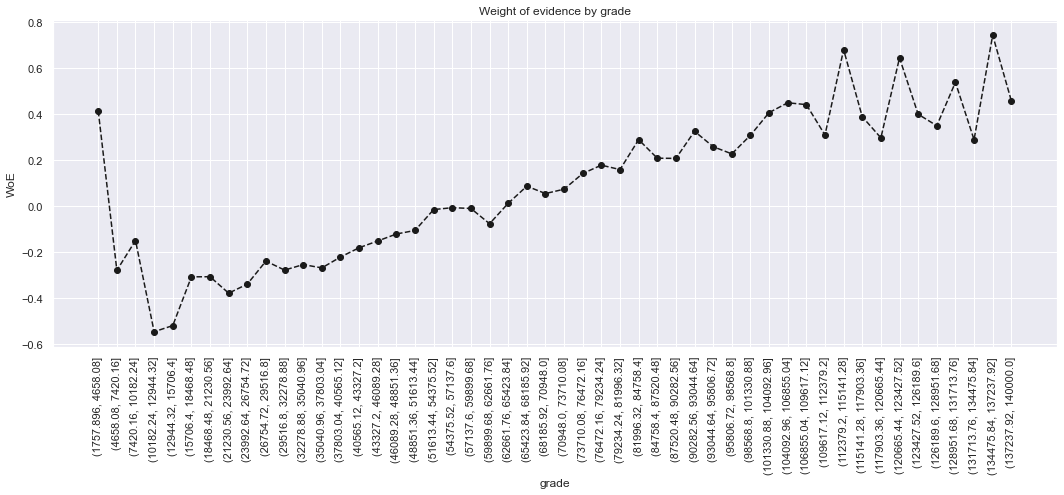

In [312]:
plot_by_woe(df_temp, 90)

In [313]:
df['annual_inc:<20K'] = np.where((df['annual_inc'] <= 20000), 1, 0)
df['annual_inc:20K-30K'] = np.where((df['annual_inc'] > 20000) & (df['annual_inc'] <= 30000), 1, 0)
df['annual_inc:30K-40K'] = np.where((df['annual_inc'] > 30000) & (df['annual_inc'] <= 40000), 1, 0)
df['annual_inc:40K-50K'] = np.where((df['annual_inc'] > 40000) & (df['annual_inc'] <= 50000), 1, 0)
df['annual_inc:50K-60K'] = np.where((df['annual_inc'] > 50000) & (df['annual_inc'] <= 60000), 1, 0)
df['annual_inc:60K-70K'] = np.where((df['annual_inc'] > 60000) & (df['annual_inc'] <= 70000), 1, 0)
df['annual_inc:70K-80K'] = np.where((df['annual_inc'] > 70000) & (df['annual_inc'] <= 80000), 1, 0)
df['annual_inc:80K-90K'] = np.where((df['annual_inc'] > 80000) & (df['annual_inc'] <= 90000), 1, 0)
df['annual_inc:90K-100K'] = np.where((df['annual_inc'] > 90000) & (df['annual_inc'] <= 100000), 1, 0)
df['annual_inc:100K-120K'] = np.where((df['annual_inc'] > 100000) & (df['annual_inc'] <= 120000), 1, 0)
df['annual_inc:120K-140K'] = np.where((df['annual_inc'] > 120000) & (df['annual_inc'] <= 140000), 1, 0)
df['annual_inc:>140K'] = np.where((df['annual_inc'] > 140000), 1, 0)

In [314]:
df_temp = df[pd.notnull(df['mths_since_last_delinq'])]
df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_temp, 'mths_since_last_delinq_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_80598/1936663753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.188, 3.76]",0.906955,5277,4786.0,491.0,0.030490,0.030927,-0.014221,NaN,NaN,inf
1,"(3.76, 7.52]",0.903734,11167,10092.0,1075.0,0.064294,0.067712,-0.051805,0.003220,0.037584,inf
2,"(7.52, 11.28]",0.909815,13306,12106.0,1200.0,0.077124,0.075586,0.020153,0.006081,0.071957,inf
3,"(11.28, 15.04]",0.904585,13216,11955.0,1261.0,0.076163,0.079428,-0.041983,0.005230,0.062135,inf
4,"(15.04, 18.8]",0.909286,9337,8490.0,847.0,0.054088,0.053351,0.013717,0.004700,0.055699,inf
5,"(18.8, 22.56]",0.908341,11641,10574.0,1067.0,0.067364,0.067208,0.002320,0.000944,0.011396,inf
6,"(22.56, 26.32]",0.909984,10887,9907.0,980.0,0.063115,0.061728,0.022217,0.001643,0.019897,inf
7,"(26.32, 30.08]",0.908807,10560,9597.0,963.0,0.061140,0.060658,0.007925,0.001178,0.014292,inf
8,"(30.08, 33.84]",0.916183,7576,6941.0,635.0,0.044219,0.039997,0.100349,0.007376,0.092424,inf
9,"(33.84, 37.6]",0.913017,9795,8943.0,852.0,0.056974,0.053666,0.059813,0.003166,0.040536,inf


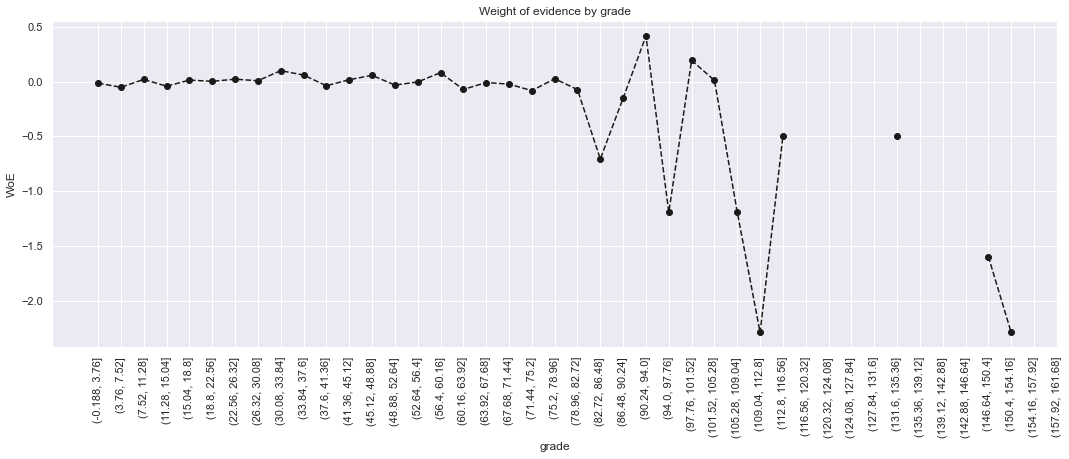

In [315]:
plot_by_woe(df_temp, 90)

In [316]:
df['mths_since_last_delinq:Missing'] = np.where((df['mths_since_last_delinq'].isnull()), 1, 0)
df['mths_since_last_delinq:0-3'] = np.where((df['mths_since_last_delinq'] >= 0) & (df['mths_since_last_delinq'] <= 3), 1, 0)
df['mths_since_last_delinq:4-30'] = np.where((df['mths_since_last_delinq'] >= 4) & (df['mths_since_last_delinq'] <= 30), 1, 0)
df['mths_since_last_delinq:31-56'] = np.where((df['mths_since_last_delinq'] >= 31) & (df['mths_since_last_delinq'] <= 56), 1, 0)
df['mths_since_last_delinq:>=57'] = np.where((df['mths_since_last_delinq'] >= 57), 1, 0)

In [317]:
df['dti_factor'] = pd.cut(df['dti'], 100)
df_temp = woe_ordered_continuous(df, 'dti_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.04, 0.4]",0.893960,745,666.0,79.0,0.001974,0.002216,-0.115737,NaN,NaN,0.027169
1,"(0.4, 0.8]",0.925743,808,748.0,60.0,0.002217,0.001683,0.275480,0.031783,0.391217,0.027169
2,"(0.8, 1.2]",0.907809,922,837.0,85.0,0.002481,0.002385,0.039594,0.017933,0.235886,0.027169
3,"(1.2, 1.6]",0.907958,1043,947.0,96.0,0.002807,0.002693,0.041372,0.000149,0.001778,0.027169
4,"(1.6, 2.0]",0.909556,1172,1066.0,106.0,0.003160,0.002974,0.060651,0.001598,0.019279,0.027169
...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",0.881188,202,178.0,24.0,0.000528,0.000673,-0.243849,0.077145,1.131764,0.027169
96,"(38.39, 38.79]",0.917098,193,177.0,16.0,0.000525,0.000449,0.155982,0.035910,0.399831,0.027169
97,"(38.79, 39.19]",0.911458,192,175.0,17.0,0.000519,0.000477,0.083994,0.005640,0.071988,0.027169
98,"(39.19, 39.59]",0.934426,183,171.0,12.0,0.000507,0.000337,0.409178,0.022968,0.325184,0.027169


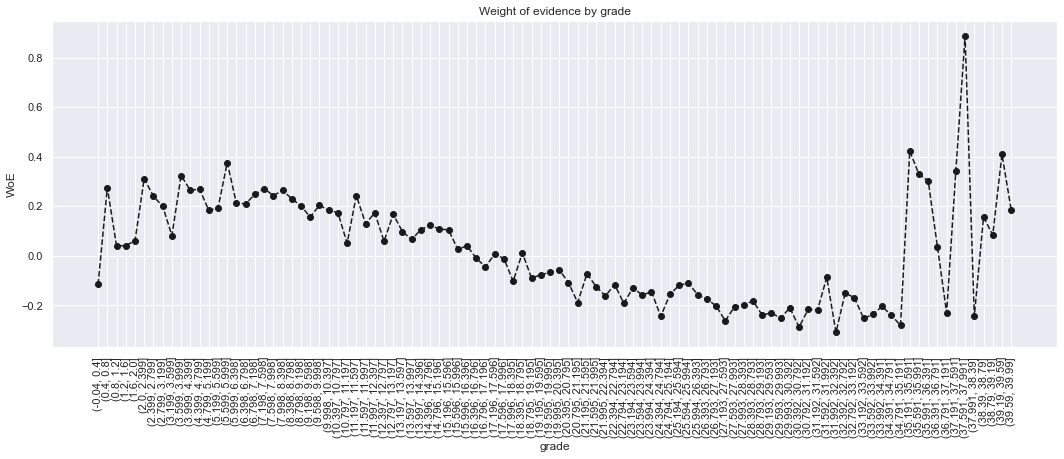

In [318]:
plot_by_woe(df_temp, 90)

In [319]:
df_temp = df.loc[df['dti'] <= 35, : ]

In [320]:
df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_temp, 'dti_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_80598/1444387856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.035, 0.7]",0.907760,1366,1240.0,126.0,0.003704,0.003558,0.040424,NaN,NaN,0.025353
1,"(0.7, 1.4]",0.904447,1664,1505.0,159.0,0.004496,0.004489,0.001483,0.003313,0.038941,0.025353
2,"(1.4, 2.1]",0.920443,1986,1828.0,158.0,0.005461,0.004461,0.202222,0.015996,0.200739,0.025353
3,"(2.1, 2.8]",0.921742,2594,2391.0,203.0,0.007143,0.005732,0.220100,0.001299,0.017878,0.025353
4,"(2.8, 3.5]",0.916427,3135,2873.0,262.0,0.008583,0.007398,0.148607,0.005315,0.071493,0.025353
5,"(3.5, 4.2]",0.927680,3844,3566.0,278.0,0.010653,0.007850,0.305418,0.011252,0.156811,0.025353
6,"(4.2, 4.9]",0.922307,4595,4238.0,357.0,0.012661,0.010080,0.227950,0.005373,0.077468,0.025353
7,"(4.9, 5.6]",0.920557,5312,4890.0,422.0,0.014609,0.011916,0.203782,0.001750,0.024169,0.025353
8,"(5.6, 6.3]",0.926101,5927,5489.0,438.0,0.016398,0.012367,0.282122,0.005544,0.078340,0.025353
9,"(6.3, 7.0]",0.920395,6482,5966.0,516.0,0.017823,0.014570,0.201565,0.005706,0.080557,0.025353


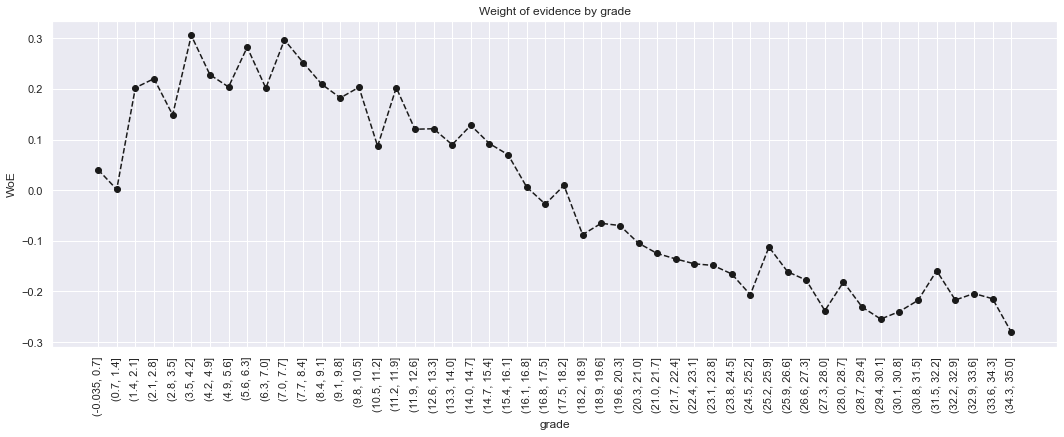

In [321]:
plot_by_woe(df_temp, 90)

In [322]:
df['dti:<=1.4'] = np.where((df['dti'] <= 1.4), 1, 0)
df['dti:1.4-3.5'] = np.where((df['dti'] > 1.4) & (df['dti'] <= 3.5), 1, 0)
df['dti:3.5-7.7'] = np.where((df['dti'] > 3.5) & (df['dti'] <= 7.7), 1, 0)
df['dti:7.7-10.5'] = np.where((df['dti'] > 7.7) & (df['dti'] <= 10.5), 1, 0)
df['dti:10.5-16.1'] = np.where((df['dti'] > 10.5) & (df['dti'] <= 16.1), 1, 0)
df['dti:16.1-20.3'] = np.where((df['dti'] > 16.1) & (df['dti'] <= 20.3), 1, 0)
df['dti:20.3-21.7'] = np.where((df['dti'] > 20.3) & (df['dti'] <= 21.7), 1, 0)
df['dti:21.7-22.4'] = np.where((df['dti'] > 21.7) & (df['dti'] <= 22.4), 1, 0)
df['dti:22.4-35'] = np.where((df['dti'] > 22.4) & (df['dti'] <= 35), 1, 0)
df['dti:>35'] = np.where((df['dti'] > 35), 1, 0)

In [323]:
df_temp = df[pd.notnull(df['mths_since_last_record'])]
df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_temp, 'mths_since_last_record_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_80598/4234046463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.121, 2.42]",0.918969,1086,998.0,88.0,0.021857,0.019973,0.090139,NaN,NaN,0.067578
1,"(2.42, 4.84]",0.921053,76,70.0,6.0,0.001533,0.001362,0.118458,0.002084,0.028319,0.067578
2,"(4.84, 7.26]",0.938650,163,153.0,10.0,0.003351,0.002270,0.389576,0.017598,0.271117,0.067578
3,"(7.26, 9.68]",0.929487,156,145.0,11.0,0.003176,0.002497,0.240561,0.009163,0.149014,0.067578
4,"(9.68, 12.1]",0.924658,292,270.0,22.0,0.005913,0.004993,0.169102,0.004830,0.071459,0.067578
5,"(12.1, 14.52]",0.932367,207,193.0,14.0,0.004227,0.003177,0.285356,0.007710,0.116253,0.067578
6,"(14.52, 16.94]",0.942857,210,198.0,12.0,0.004336,0.002724,0.465083,0.010490,0.179728,0.067578
7,"(16.94, 19.36]",0.916168,334,306.0,28.0,0.006702,0.006355,0.053103,0.026689,0.411980,0.067578
8,"(19.36, 21.78]",0.936396,283,265.0,18.0,0.005804,0.004085,0.351081,0.020228,0.297977,0.067578
9,"(21.78, 24.2]",0.916484,455,417.0,38.0,0.009133,0.008625,0.057223,0.019912,0.293858,0.067578


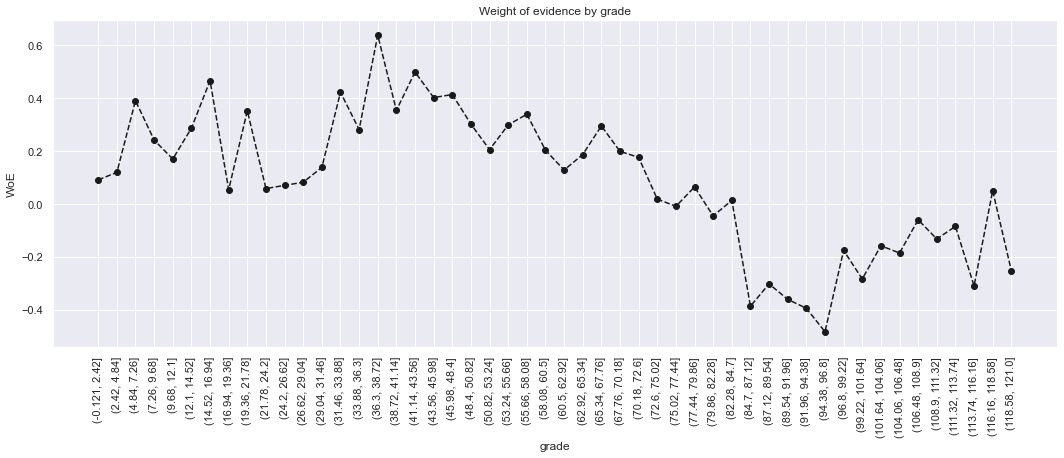

In [324]:
plot_by_woe(df_temp, 90)

In [325]:
df['mths_since_last_record:Missing'] = np.where((df['mths_since_last_record'].isnull()), 1, 0)
df['mths_since_last_record:0-2'] = np.where((df['mths_since_last_record'] >= 0) & (df['mths_since_last_record'] <= 2), 1, 0)
df['mths_since_last_record:3-20'] = np.where((df['mths_since_last_record'] >= 3) & (df['mths_since_last_record'] <= 20), 1, 0)
df['mths_since_last_record:21-31'] = np.where((df['mths_since_last_record'] >= 21) & (df['mths_since_last_record'] <= 31), 1, 0)
df['mths_since_last_record:32-80'] = np.where((df['mths_since_last_record'] >= 32) & (df['mths_since_last_record'] <= 80), 1, 0)
df['mths_since_last_record:81-86'] = np.where((df['mths_since_last_record'] >= 81) & (df['mths_since_last_record'] <= 86), 1, 0)
df['mths_since_last_record:>=86'] = np.where((df['mths_since_last_record'] >= 86), 1, 0)

In [326]:
df.drop(df.columns[df.columns.map(lambda x:'factor' in x)],axis=1)\
.to_csv('../processed/x_train_04_output.csv',index=False)